# Stock Market Prediction

In [1]:
import numpy as np
import pandas as pd
import sys

In [2]:
df_stocks = pd.read_pickle('/Users/arunjoseph/Documents/Project Stock predictions/data/pickled_ten_year_filtered_data.pkl')

In [3]:
df_stocks['prices'] = df_stocks['close'].apply(np.int64)
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

In [4]:
df_stocks

,close,articles,prices
2008-01-01,13154.400000,Huckabee Thanks Bloggers. Spawning Something ...,13154
2008-01-02,13044.000000,Clinton's Late-Night Rally on Caucus Eve. Len...,13044
2008-01-03,13056.700000,Congrats to the Iowa victors. Live From Des M...,13056
2008-01-04,12800.200000,Oh-ba-ma Fires It Up. Clinton at N.H. Democra...,12800
2008-01-05,12809.300000,New Hampshire and Those Labor Ads. Live Blogg...,12809
2008-01-06,12818.400000,NBC Wrestles With Golden Globe Dilemma. Tom H...,12818
2008-01-07,12827.500000,"After Iowa, Campaigns Cast Even Wider Net Onl...",12827
2008-01-08,12589.100000,The Vanishing TV Guide. Globes Organizers Off...,12589
2008-01-09,12735.300000,Respond to Today's Column: Hillary's Free Pas...,12735
2008-01-10,12853.100000,A Ploy for 'Uncommitted' in Michigan. Have $2...,12853


In [5]:
df = df_stocks[['prices']].copy()

In [6]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii', 'ignore')
        ss = sid.polarity_scores(sentence)
        df.at[date, 'compound'] = ss['compound']
        df.at[date, 'neg'] = ss['neg']
        df.at[date, 'neu'] = ss['neu']
        df.at[date, 'pos'] = ss['pos']
        
    except TypeError:
        ss = sid.polarity_scores(df_stocks.loc[date, 'articles'])
        df.at[date, 'compound'] = ss['compound']
        df.at[date, 'neg'] = ss['neg']
        df.at[date, 'neu'] = ss['neu']
        df.at[date, 'pos'] = ss['pos']
        pass

In [8]:
df

,prices,compound,neg,neu,pos
2008-01-01,13154,-0.9897,0.133,0.77,0.097
2008-01-02,13044,-0.998,0.142,0.8,0.058
2008-01-03,13056,-0.9903,0.085,0.866,0.049
2008-01-04,12800,-0.9834,0.103,0.821,0.076
2008-01-05,12809,-0.8574,0.114,0.796,0.089
2008-01-06,12818,-0.9671,0.128,0.777,0.096
2008-01-07,12827,-0.9914,0.098,0.84,0.062
2008-01-08,12589,-0.9987,0.151,0.755,0.094
2008-01-09,12735,-0.9976,0.154,0.758,0.089
2008-01-10,12853,-0.9954,0.126,0.797,0.077


In [9]:
# Increasing the prices by a constant value so that it represents closing price during the testing
from datetime import datetime, timedelta

def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [10]:
train_start_date = '2008-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2017-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [11]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [12]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [13]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(numpy_df_train, y_train)   

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
prediction = lr.predict(numpy_df_test)

In [16]:
prediction

array([11842, 11842, 11842, ..., 12878, 11842, 11842])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [19]:
predictions_df

,prices
2015-01-01,11842
2015-01-02,11842
2015-01-03,11842
2015-01-04,11842
2015-01-05,11842
2015-01-06,11842
2015-01-07,11842
2015-01-08,11842
2015-01-09,11842
2015-01-10,11842


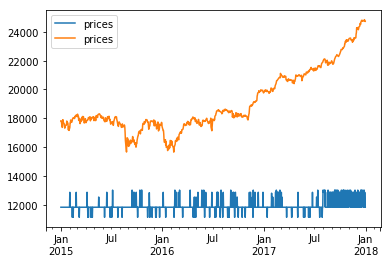

In [20]:
predictions_plot = predictions_df.plot()
fig = y_test.plot(ax = predictions_plot).get_figure()

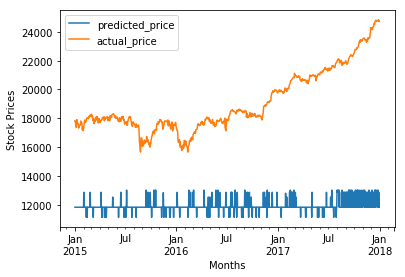

In [21]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot()
ax.set_xlabel("Months")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [22]:
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df)
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,17679
2015-01-02,17679
2015-01-03,17679
2015-01-04,17679
2015-01-05,17679
2015-01-06,17679
2015-01-07,17679
2015-01-08,17679
2015-01-09,17679
2015-01-10,17679


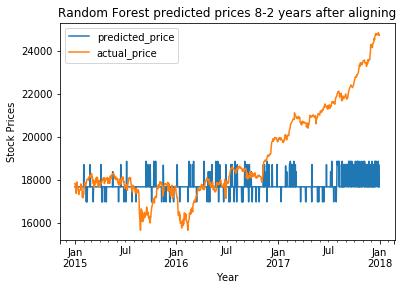

In [23]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Year")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [24]:
# Applying EWMA pandas to smooth the stock prices
predictions_df['ewma'] = predictions_df['prices'].ewm(span=60, freq="D").mean()

In [25]:
predictions_df

,prices,ewma
2015-01-01,17679,17679.000000
2015-01-02,17679,17679.000000
2015-01-03,17679,17679.000000
2015-01-04,17679,17679.000000
2015-01-05,17679,17679.000000
2015-01-06,17679,17679.000000
2015-01-07,17679,17679.000000
2015-01-08,17679,17679.000000
2015-01-09,17679,17679.000000
2015-01-10,17679,17679.000000


In [26]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60, freq="D").mean()

In [27]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2015-01-01,17679,17679.000000,17828,17828.000000
2015-01-02,17679,17679.000000,17832,17830.033333
2015-01-03,17679,17679.000000,17722,17792.815295
2015-01-04,17679,17679.000000,17612,17745.326592
2015-01-05,17679,17679.000000,17501,17693.150223
2015-01-06,17679,17679.000000,17371,17634.886512
2015-01-07,17679,17679.000000,17584,17626.870225
2015-01-08,17679,17679.000000,17907,17666.105392
2015-01-09,17679,17679.000000,17737,17675.072954
2015-01-10,17679,17679.000000,17705,17678.534141


In [28]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

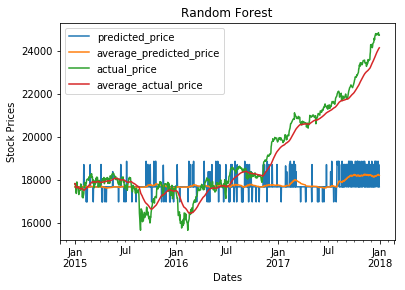

In [29]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()


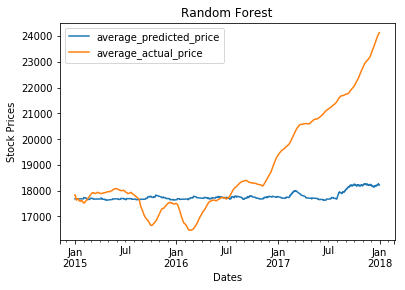

In [30]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/Logistic Regressor.png")

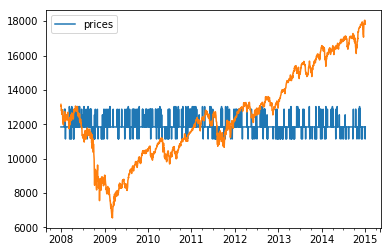

In [31]:
# checking the performance of training data itself
prediction = lr.predict(numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

# RandomForestRegressor

In [32]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
print rf.feature_importances_

[ 0.32932505  0.24460558  0.21673673  0.20933264]


In [34]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [35]:
prediction

array([ 12979.3,  14340.6,  14619.9, ...,  12700.7,  14338.7,  12347.7])

In [36]:
contributions

array([[  724.2294758 ,    12.60971667,   547.43303782,  -797.88239845],
       [ 1295.52882495,   168.16382003,  -109.78022322,   493.77741008],
       [  701.72869213,   418.88275314,   184.68180053,   821.69658603],
       ..., 
       [  995.44854224,  -871.16431133, -1403.89761281,  1487.40321374],
       [ 1265.8357179 ,  -296.61495598,  -944.71842061,  1821.28749053],
       [  477.03585843,  -511.80367285,  -168.52549737,    58.08314362]])

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [39]:
predictions_df

,prices
2015-01-01,12979.3
2015-01-02,14340.6
2015-01-03,14619.9
2015-01-04,13481.9
2015-01-05,13424.8
2015-01-06,14123.5
2015-01-07,15066.3
2015-01-08,13173.5
2015-01-09,15464.9
2015-01-10,12780.6


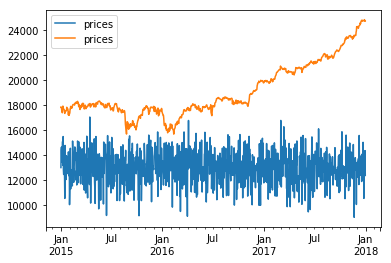

In [40]:
predictions_plot = predictions_df.plot()
fig = y_test.plot(ax = predictions_plot).get_figure()

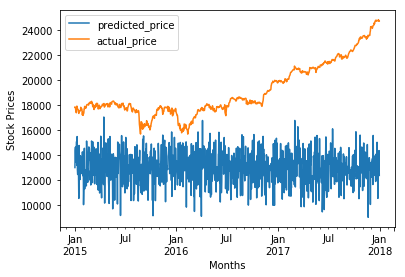

In [41]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot()
ax.set_xlabel("Months")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [42]:
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df)
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,16712.77
2015-01-02,18074.07
2015-01-03,18353.37
2015-01-04,17215.37
2015-01-05,17158.27
2015-01-06,17856.97
2015-01-07,18799.77
2015-01-08,16906.97
2015-01-09,19198.37
2015-01-10,16514.07


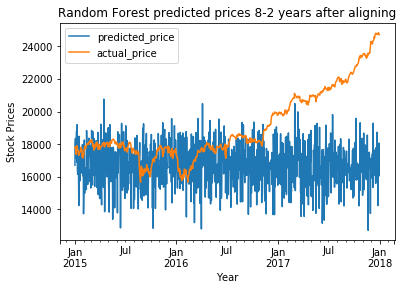

In [43]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Year")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [44]:
# Applying EWMA pandas to smooth the stock prices
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60, freq="D").mean()

In [45]:
predictions_df

,prices,ewma
2015-01-01,16712.77,16712.770000
2015-01-02,18074.07,17404.764167
2015-01-03,18353.37,17731.563751
2015-01-04,17215.37,17595.992412
2015-01-05,17158.27,17502.516028
2015-01-06,17856.97,17566.622156
2015-01-07,18799.77,17760.883213
2015-01-08,16906.97,17641.283548
2015-01-09,19198.37,17838.241688
2015-01-10,16514.07,17685.095752


In [46]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60, freq="D").mean()

In [47]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2015-01-01,16712.77,16712.770000,17828,17828.000000
2015-01-02,18074.07,17404.764167,17832,17830.033333
2015-01-03,18353.37,17731.563751,17722,17792.815295
2015-01-04,17215.37,17595.992412,17612,17745.326592
2015-01-05,17158.27,17502.516028,17501,17693.150223
2015-01-06,17856.97,17566.622156,17371,17634.886512
2015-01-07,18799.77,17760.883213,17584,17626.870225
2015-01-08,16906.97,17641.283548,17907,17666.105392
2015-01-09,19198.37,17838.241688,17737,17675.072954
2015-01-10,16514.07,17685.095752,17705,17678.534141


In [48]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

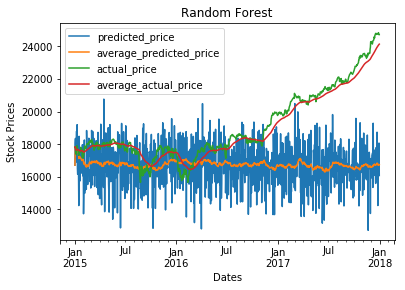

In [49]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()


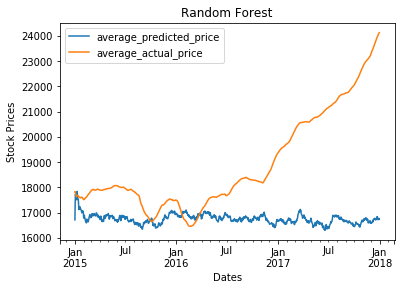

In [50]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/Random Forest Regressor.png")

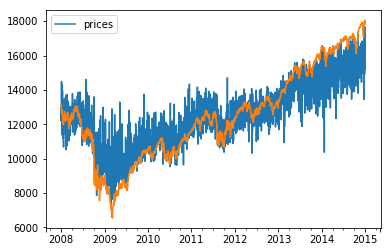

In [51]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

# MLP Classifier

In [52]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
mlpc.fit(numpy_df_train, y_train)   

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [53]:
prediction = mlpc.predict(numpy_df_test)

In [54]:
prediction

array([11842, 10405, 12684, ..., 16294, 12921, 10462])

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [57]:
predictions_df

,prices
2015-01-01,11842
2015-01-02,10405
2015-01-03,12684
2015-01-04,12130
2015-01-05,12302
2015-01-06,8763
2015-01-07,10389
2015-01-08,12582
2015-01-09,10405
2015-01-10,12582


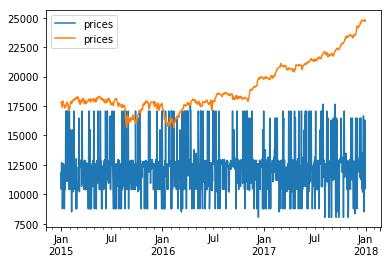

In [58]:
predictions_plot = predictions_df.plot()
fig = y_test.plot(ax = predictions_plot).get_figure()

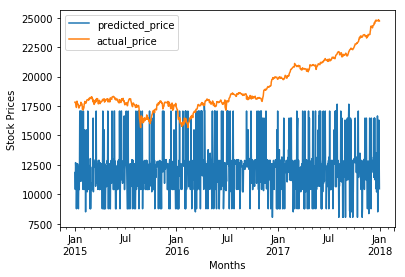

In [59]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot()
ax.set_xlabel("Months")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [60]:
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df)
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,18113
2015-01-02,16676
2015-01-03,18955
2015-01-04,18401
2015-01-05,18573
2015-01-06,15034
2015-01-07,16660
2015-01-08,18853
2015-01-09,16676
2015-01-10,18853


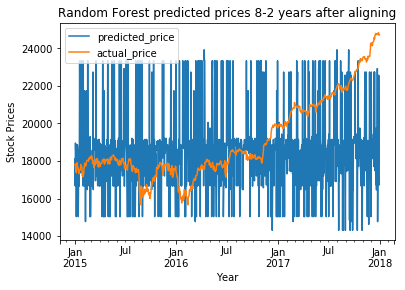

In [61]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Year")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [62]:
# Applying EWMA pandas to smooth the stock prices
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60, freq="D").mean()

In [63]:
predictions_df

,prices,ewma
2015-01-01,18113,18113.000000
2015-01-02,16676,17382.525000
2015-01-03,18955,17924.250718
2015-01-04,18401,18049.462498
2015-01-05,18573,18161.264844
2015-01-06,15034,17595.671404
2015-01-07,16660,17448.272601
2015-01-08,18853,17645.019676
2015-01-09,16676,17522.446961
2015-01-10,18853,17676.330927


In [64]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60, freq="D").mean()

In [65]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2015-01-01,18113,18113.000000,17828,17828.000000
2015-01-02,16676,17382.525000,17832,17830.033333
2015-01-03,18955,17924.250718,17722,17792.815295
2015-01-04,18401,18049.462498,17612,17745.326592
2015-01-05,18573,18161.264844,17501,17693.150223
2015-01-06,15034,17595.671404,17371,17634.886512
2015-01-07,16660,17448.272601,17584,17626.870225
2015-01-08,18853,17645.019676,17907,17666.105392
2015-01-09,16676,17522.446961,17737,17675.072954
2015-01-10,18853,17676.330927,17705,17678.534141


In [66]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

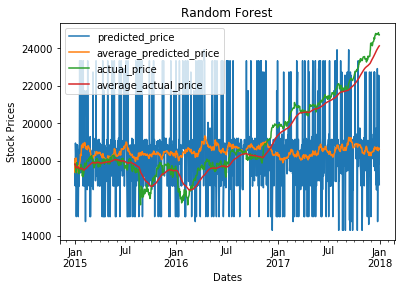

In [67]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()


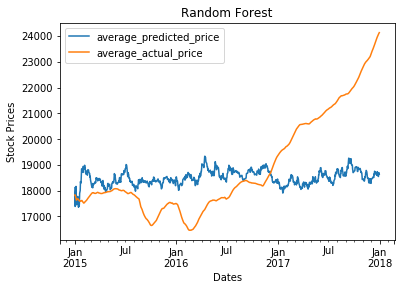

In [68]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/MLP Classifier.png")

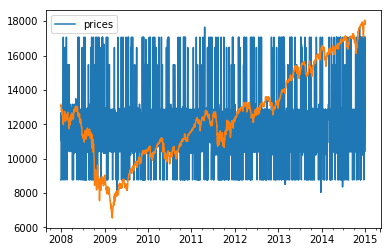

In [69]:
# checking the performance of training data itself
prediction = mlpc.predict(numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()

# LogisticRegression

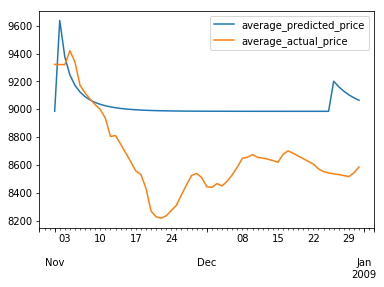

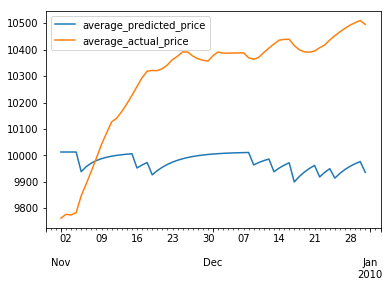

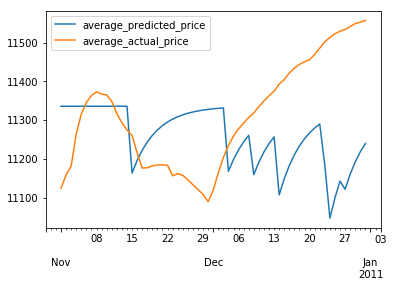

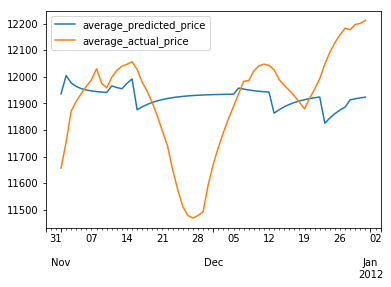

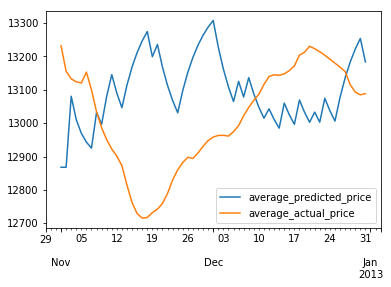

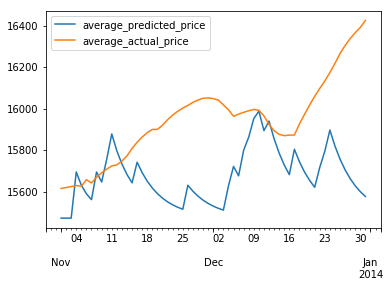

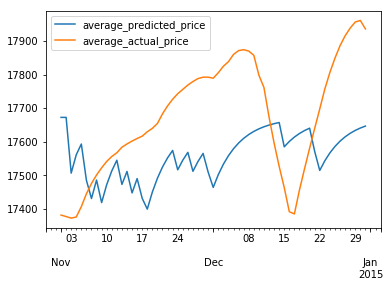

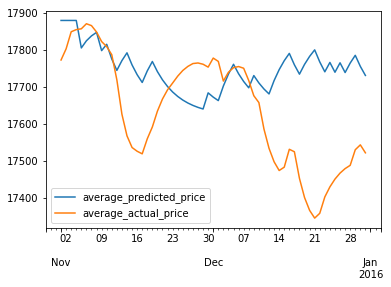

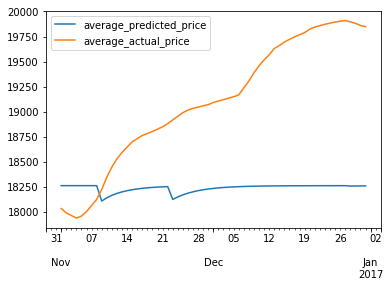

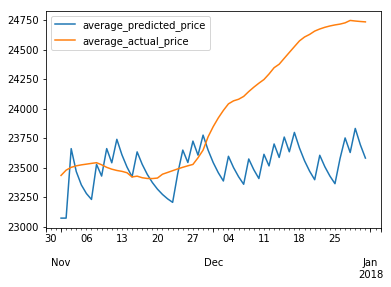

In [70]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, freq="D").mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, freq="D").mean()
    
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

In [71]:
lr.classes_

array([19732, 19799, 19804, 19808, 19818, 19822, 19826, 19827, 19841,
       19851, 19855, 19856, 19864, 19870, 19881, 19884, 19885, 19887,
       19890, 19891, 19899, 19912, 19938, 19942, 19954, 19963, 19971,
       20012, 20052, 20054, 20058, 20065, 20068, 20071, 20090, 20093,
       20100, 20172, 20269, 20316, 20364, 20404, 20412, 20453, 20499,
       20504, 20523, 20545, 20547, 20550, 20566, 20578, 20581, 20591,
       20596, 20606, 20611, 20619, 20624, 20636, 20648, 20650, 20651,
       20653, 20654, 20656, 20657, 20658, 20659, 20661, 20662, 20663,
       20668, 20683, 20689, 20691, 20701, 20713, 20728, 20743, 20763,
       20775, 20804, 20810, 20812, 20821, 20826, 20832, 20834, 20837,
       20855, 20858, 20864, 20881, 20888, 20894, 20895, 20896, 20902,
       20905, 20908, 20911, 20913, 20914, 20919, 20922, 20924, 20925,
       20931, 20934, 20937, 20940, 20943, 20949, 20950, 20951, 20953,
       20954, 20957, 20971, 20975, 20979, 20981, 20988, 20996, 21002,
       21005, 21006,

In [72]:
lr.coef_

array([[ 0.56952971, -0.3637604 , -1.91537729, -0.29179207],
       [ 0.56740944, -0.33428151, -1.95290531, -0.26719494],
       [ 0.56790586, -0.35157139, -1.94178269, -0.26573955],
       ..., 
       [ 0.80109479, -0.39745609, -1.82087761, -0.33293012],
       [ 1.16482565, -0.34915346, -1.86400567, -0.26081065],
       [ 0.94750343, -0.3115553 , -1.91837541, -0.24682527]])

# RandomForestRegressor

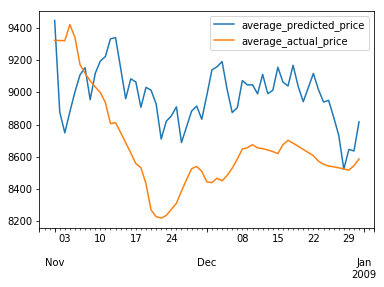

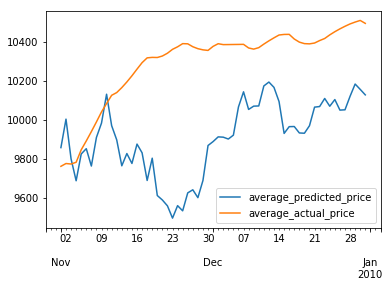

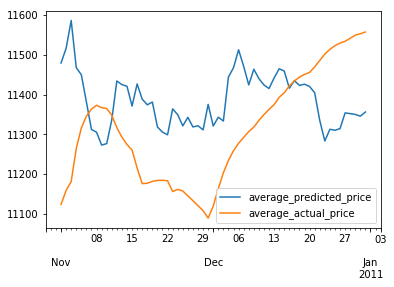

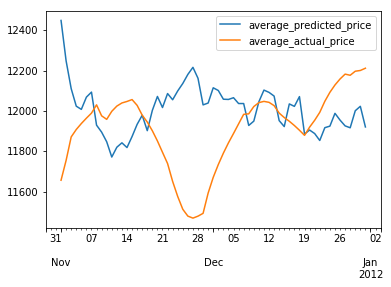

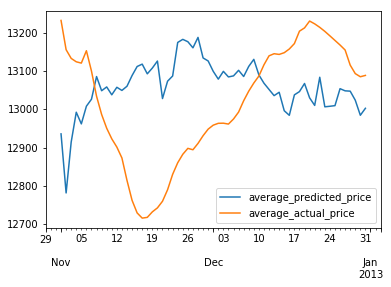

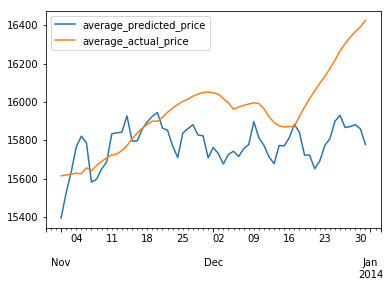

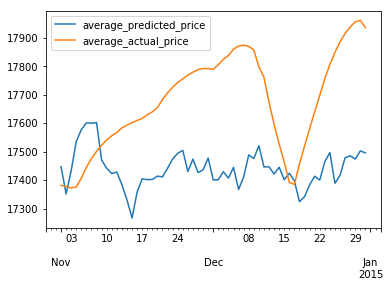

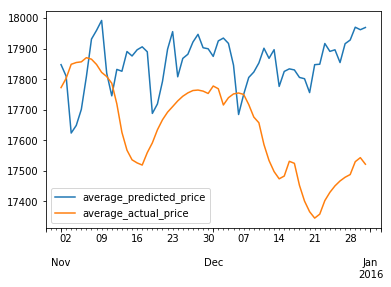

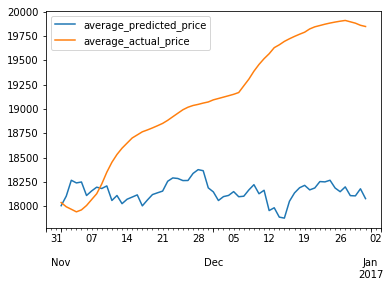

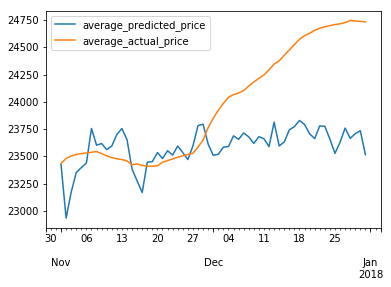

In [73]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], 
                                      df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], 
                                      df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor()
    rf.fit(numpy_df_train, train['prices'])
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, freq="D").mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, freq="D").mean()
    
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

# MLP Classifier

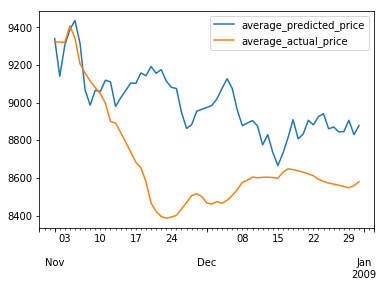

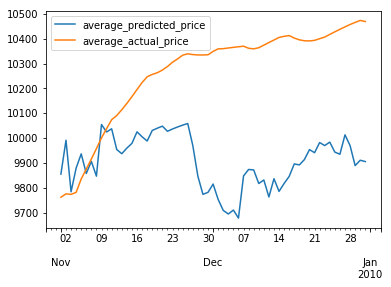

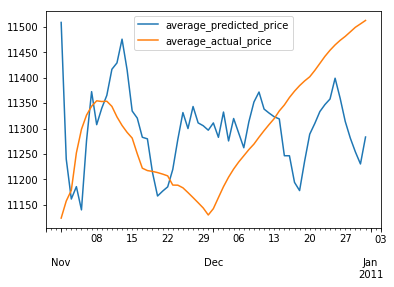

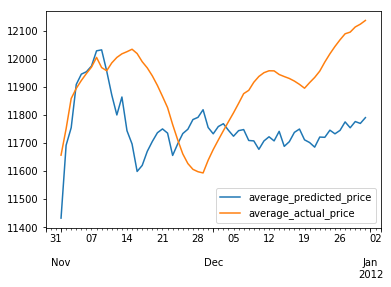

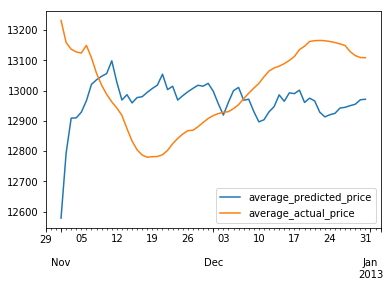

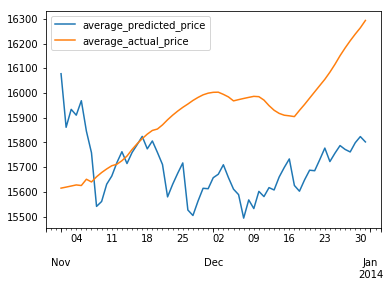

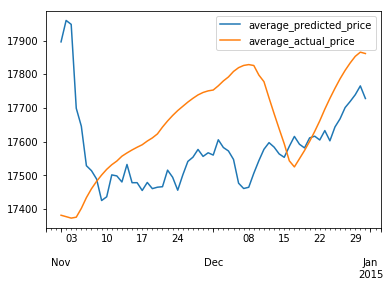

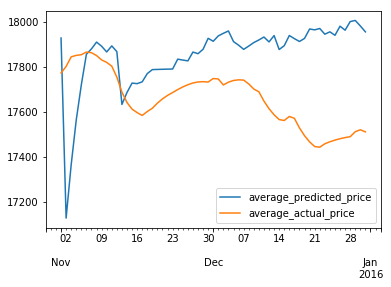

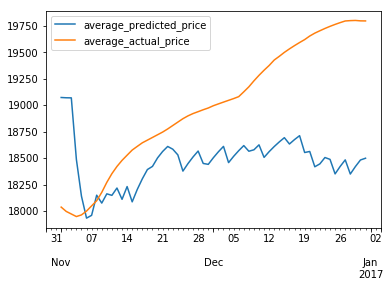

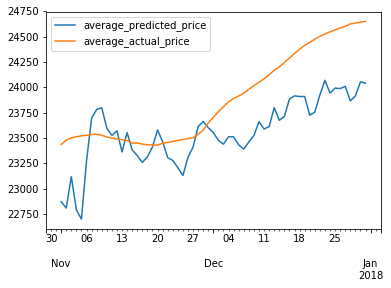

In [74]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], 
                                      df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], 
                                      df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)

    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20, freq="D").mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20, freq="D").mean()
    
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    

# ------------------------------------------------------------------------------------------ #